# **Analyse our Human Experiment Data**
- preprocessing (incl getting modes and agreement)
- saving as pickle files
- comparison with ground truth
used for both train and test set human experiments

### Loading and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd gdrive/My\ Drive/Help-Hinder_GNN_Project/SocialGNN_Final

/content/gdrive/My Drive/Help-Hinder_GNN_Project/SocialGNN_Final


In [ ]:
import os
dataset = "train"

if dataset == "train":
  path = path = './Human_Experiment_Files/responses'
elif dataset == "test":
  path = './Human_Experiment_Files/responses_test'
n_subjects = len(os.listdir(path))
n_subjects

if dataset == "train":
  a = "D082120_2101060_0_F8_E12.1_G['LMA', 0, 0, 1]_['LMA', 0, 0, -1]_ST1_3_SZ0_0_3_0_P13_0_6_10_A0_0_C0_0_AN-3.45_1.43_MCTS_L100_R0.0_-10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e92_mm.mp4"
  f = "D081920_1135270_0_F8_E13.2_G['LMO', 0, 3, 1]_['LMO', 0, 3, 1]_ST2_2_SZ0_0_0_3_P7_15_16_17_A0_0_C0_0_AN-6.08_5.6_MCTS_L100_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e10_mm.mp4"
  n = "D082920_2343080_0_F8_E4_G['LMA', 0, 1, 1]_['LMA', 1, 3, 1]_ST3_2_SZ3_0_3_3_P7_5_14_1_A0_0_C0_0_AN-3.09_-0.6_MCTS_L100_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e13_mm.mp4"
elif dataset == "test":
  a = "D082320_13360100_0_F8_E4_G['LMA', 1, 3, -1]_['LMA', 1, 3, 1]_ST3_1_SZ3_0_0_2_P3_0_4_2_A0_0_C0_0_AN-0.43_-4.93_MCTS_L1_R-10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e287_mm.mp4"
  f = "D083020_06230200_0_F8_E12_G['LMO', 1, 1, 1]_['LMO', 1, 1, 1]_ST0_3_SZ0_0_2_1_P17_1_10_17_A0_0_C0_0_AN1.07_-1.76_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e348_mm.mp4"
  n = "D082520_08100400_0_F8_E0_G['LMA', 0, 3, 1]_['LMO', 1, 0, 1]_ST2_3_SZ3_1_0_3_P17_3_7_11_A0_0_C0_0_AN4.62_-1.71_MCTS_L1_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e322_mm.mp4"




In [ ]:
human_responses = []
for root, dirs, files, in os.walk(path):
  for file in files:
    if file.endswith(".txt"):
      responses = []
      with open(path + '/' + file, 'r') as my_file:
        responses = my_file.readlines()
      if len(responses)==24:
        human_responses.append(responses)
      else:
        print(file, len(responses))

5f136401b1f46a36f39a8c72_2021-08-15.txt 1
6117983a794d330f8f905230_2021-08-16.txt 23
61163dd00037529577b17551_2021-08-16.txt 17
6118b6b55592b7d04247ff45_2021-08-21.txt 11
611207a20c961cea9f8e7379_2021-08-21.txt 12
61038275adbb6f53ae85b482_2021-08-21.txt 27
610cd62bd64519087a99397d_2021-08-21.txt 21
6108d6efa698e3dbe3b313d3_2021-08-21.txt 4
6107860ee9d47b960ee68714_2021-08-21.txt 5
611e34980e5e69f5236fa629_2021-08-21.txt 13
6112c77c4cb58daede378463_2021-08-21.txt 19
60ff00dfe728d14dfa568245_2021-08-21.txt 29
61141a6f6fe3054620af1e8d_2021-08-21.txt 3
60fcd0022b1085e2284339f4_2021-08-22.txt 23
6118b6b55592b7d04247ff45_2021-08-22.txt 13
610dcf369adaa0cfbc795ec5_2021-08-22.txt 23
60ff7307eafb590bdc696a8f_2021-08-21.txt 1
610cd62bd64519087a99397d_2021-08-22.txt 3
61141a6f6fe3054620af1e8d_2021-08-22.txt 21
6112c77c4cb58daede378463_2021-08-22.txt 5
5f8051b402daee04b8108440_2021-09-06.txt 5
60fcd0022b1085e2284339f4_2021-08-21.txt 1
60ff7307eafb590bdc696a8f_2021-08-22.txt 23
611207a20c961cea9f8e

In [ ]:
def reject_exampleVideoBased(subject, example_videos = {}):
  reject_flag = 0
  demographic_info = ast.literal_eval(subject[0])
  for response_no in range(1,len(subject)):
    entry_txt = ast.literal_eval(subject[response_no])
    entry = {}
    for x,y in entry_txt:
      entry[x] = y

    if entry["video_name"]== example_videos['adversarial']:
      a_check.append(entry["likert_response"])
      if entry["likert_response"]!="adversarial":
        #print("a",entry['subjectID'], entry['likert_response'])
        reject_flag = 1
    
    if entry["video_name"]== example_videos['friendly']:
      f_check.append(entry["likert_response"])
      if entry["likert_response"]!="friendly":
        #print("f",entry['subjectID'], entry['likert_response'])
        reject_flag = 1

    if entry["video_name"]== example_videos['neutral']:
      n_check.append(entry["likert_response"])
      if entry["likert_response"]!="neutral":
        #print("n",entry['subjectID'], entry['likert_response'])
        reject_flag = 1

  return reject_flag

In [ ]:
import ast

a_check = []
f_check = []
n_check = []

no_subjects_to_reject_exampleVideoBased = 0
for subject in human_responses:
  reject_flag = reject_exampleVideoBased(subject, example_videos= {"adversarial": a, "friendly":f, "neutral":n})
    
  if reject_flag == 1:
    no_subjects_to_reject_exampleVideoBased += 1

print(n_check)
print(f_check)
print(a_check)
from collections import Counter
print(Counter(n_check))
print(Counter(f_check))
print(Counter(a_check))

print("No. of subjects to be rejected: ", no_subjects_to_reject_exampleVideoBased)

['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'adversarial', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'friendly', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'adversarial', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'adversarial', 'neutral', 'neutral', 'neutral', 'adversarial', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'adversarial', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'adversarial', 'neutral', 'neutral', 'neutral', 'neutral', 'neutr

In [ ]:
import pandas as pd
import scipy
import numpy as np
print("No. of (complete) Human Responses ", len(human_responses))

data_filtered = {'videos':[], 'relationship':[]}
demographics = {'age':[], 'gender':[], 'ethnicity':[]}

for subject in human_responses:
  demographic_info = ast.literal_eval(subject[0])
  info = {}
  for x in demographic_info:
    info[x[0]] = x[1]
  demographics['age'].append(int(info['age']))
  demographics['gender'].append(info['gender'])
  demographics['ethnicity'].append(info['ethnicity'])

  if reject_exampleVideoBased(subject, example_videos= {"adversarial": a, "friendly":f, "neutral":n}) == 1:
    continue

  for response_no in range(1,len(subject)):
    entry_txt = ast.literal_eval(subject[response_no])
    entry = {}
    for x,y in entry_txt:
      entry[x] = y

    data_filtered['videos'].append(entry["video_name"])
    data_filtered['relationship'].append(entry["likert_response"])

print(Counter(data_filtered['relationship']))
print(Counter(data_filtered['videos']))
print(Counter(demographics['ethnicity']))
print(Counter(demographics['gender']))
print(min(demographics['age']), max(demographics['age']), np.mean(demographics['age']))

data = pd.DataFrame(data_filtered)


HR = data.groupby(by='videos').agg(lambda x: Counter(x))
#HR.index = HR.index.str[:14]
display(HR)

''' for range of no. of raters per video
HR = data.groupby(by='videos').agg(lambda x: len(x))
import numpy as np
x = sorted(HR['relationship'])[:-3]
print(sorted(x))
print(min(x), max(x), len(x), np.median(x))
'''

No. of (complete) Human Responses  298
Counter({'friendly': 2133, 'adversarial': 1924, 'neutral': 1486})
Counter({"D081920_1135270_0_F8_E13.2_G['LMO', 0, 3, 1]_['LMO', 0, 3, 1]_ST2_2_SZ0_0_0_3_P7_15_16_17_A0_0_C0_0_AN-6.08_5.6_MCTS_L100_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e10_mm.mp4": 241, "D082920_2343080_0_F8_E4_G['LMA', 0, 1, 1]_['LMA', 1, 3, 1]_ST3_2_SZ3_0_3_3_P7_5_14_1_A0_0_C0_0_AN-3.09_-0.6_MCTS_L100_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e13_mm.mp4": 241, "D082120_2101060_0_F8_E12.1_G['LMA', 0, 0, 1]_['LMA', 0, 0, -1]_ST1_3_SZ0_0_3_0_P13_0_6_10_A0_0_C0_0_AN-3.45_1.43_MCTS_L100_R0.0_-10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e92_mm.mp4": 241, "D082920_03052000_0_F8_E8_G['LMO', 1, 2, 1]_['LMO', 0, 3, 1]_ST3_2_SZ0_3_2_0_P11_12_4_14_A0_0_C0_0_AN-5.67_-5.13_MCTS_L8_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e226.mp4": 15, "D120320_08110800_0_F8_E21_G['LMO', 1, 2, 1]_['LMO', 1, 2, 1]_ST1_1_SZ1_0_2_0_P17_5_6_4_A0_0_C0_0_AN2.63_2.45_MCTS_L1_R0.0_0.0_PL1_EL1_0_0_s1000_r10

,relationship
videos,
"D081820_13363300_0_F8_E0_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_2_SZ0_3_0_3_P13_13_12_10_A0_0_C0_0_AN-0.12_4.61_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e61.mp4","{'adversarial': 2, 'friendly': 11}"
"D081820_16545200_0_F8_E2_G['LMA', 0, 1, 1]_['LMA', 0, 1, -1]_ST1_3_SZ0_1_0_1_P2_2_3_2_A0_0_C0_0_AN-1.91_-2.23_MCTS_L1_R0.0_-10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e314.mp4",{'adversarial': 14}
"D081920_01561200_0_F8_E6_G['LMA', 1, 1, -1]_['LMA', 1, 1, 1]_ST2_1_SZ0_3_1_1_P4_6_5_4_A0_0_C0_0_AN-5.47_-0.63_MCTS_L1_R-10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e191.mp4","{'adversarial': 10, 'neutral': 1}"
"D081920_03595900_0_F8_E7_G['LMA', 1, 2, -1]_['LMA', 1, 2, 1]_ST1_1_SZ3_0_1_1_P3_4_3_12_A0_0_C0_0_AN3.44_2.49_MCTS_L1_R-10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e90.mp4","{'neutral': 1, 'adversarial': 7, 'friendly': 3}"
"D081920_08023200_0_F8_E6_G['LMO', 1, 0, 1]_['LMO', 1, 0, 1]_ST0_1_SZ0_1_0_1_P2_3_4_1_A0_0_C0_0_AN6.18_-0.5_MCTS_L1_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e383.mp4",{'friendly': 10}
...,...
"D121320_07145900_0_F8_E20_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_1_SZ2_3_0_0_P11_17_3_17_A0_0_C0_0_AN-5.44_1.29_MCTS_L1_R10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e57.mp4","{'neutral': 5, 'friendly': 8}"
"D121320_13405400_0_F8_E12_G['LMO', 1, 2, 1]_['LMO', 1, 2, 1]_ST1_2_SZ1_3_1_0_P17_11_15_3_A0_0_C0_0_AN-2.8_-5.86_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e75.mp4","{'friendly': 10, 'neutral': 1}"
"D121420_00140200_0_F8_E12_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_2_SZ1_3_0_1_P17_11_3_15_A0_0_C0_0_AN-2.8_-5.86_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e54.mp4","{'friendly': 9, 'neutral': 2}"


" for range of no. of raters per video\nHR = data.groupby(by='videos').agg(lambda x: len(x))\nimport numpy as np\nx = sorted(HR['relationship'])[:-3]\nprint(sorted(x))\nprint(min(x), max(x), len(x), np.median(x))\n"

### HR final labels

In [ ]:
from scipy import stats
final_labels = data.groupby(by='videos').agg(lambda x: stats.mode(x)[0][0])

final_labels = final_labels.drop(a)
final_labels = final_labels.drop(f)
final_labels = final_labels.drop(n)

final_labels_dict = final_labels.to_dict('index')

display(final_labels)
print(Counter(final_labels.relationship))

,relationship
videos,
"D081820_13363300_0_F8_E0_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_2_SZ0_3_0_3_P13_13_12_10_A0_0_C0_0_AN-0.12_4.61_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e61.mp4",friendly
"D081820_16545200_0_F8_E2_G['LMA', 0, 1, 1]_['LMA', 0, 1, -1]_ST1_3_SZ0_1_0_1_P2_2_3_2_A0_0_C0_0_AN-1.91_-2.23_MCTS_L1_R0.0_-10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e314.mp4",adversarial
"D081920_01561200_0_F8_E6_G['LMA', 1, 1, -1]_['LMA', 1, 1, 1]_ST2_1_SZ0_3_1_1_P4_6_5_4_A0_0_C0_0_AN-5.47_-0.63_MCTS_L1_R-10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e191.mp4",adversarial
"D081920_03595900_0_F8_E7_G['LMA', 1, 2, -1]_['LMA', 1, 2, 1]_ST1_1_SZ3_0_1_1_P3_4_3_12_A0_0_C0_0_AN3.44_2.49_MCTS_L1_R-10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e90.mp4",adversarial
"D081920_08023200_0_F8_E6_G['LMO', 1, 0, 1]_['LMO', 1, 0, 1]_ST0_1_SZ0_1_0_1_P2_3_4_1_A0_0_C0_0_AN6.18_-0.5_MCTS_L1_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e383.mp4",friendly
...,...
"D121320_07145900_0_F8_E20_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_1_SZ2_3_0_0_P11_17_3_17_A0_0_C0_0_AN-5.44_1.29_MCTS_L1_R10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e57.mp4",friendly
"D121320_13405400_0_F8_E12_G['LMO', 1, 2, 1]_['LMO', 1, 2, 1]_ST1_2_SZ1_3_1_0_P17_11_15_3_A0_0_C0_0_AN-2.8_-5.86_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e75.mp4",friendly
"D121420_00140200_0_F8_E12_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_2_SZ1_3_0_1_P17_11_3_15_A0_0_C0_0_AN-2.8_-5.86_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e54.mp4",friendly


Counter({'friendly': 161, 'adversarial': 154, 'neutral': 85})


### HR agreement

In [ ]:
def agreement_ratings(ratings):
  mapping = {'friendly': 0, 'Friendly': 0, 'neutral': 1, 'Neutral' : 1, 'adversarial': 2, 'Adversarial' : 2}
  ratings_int = [mapping[x] for x in ratings]
  #median = np.median(ratings_int)
  mode = scipy.stats.mode(ratings_int)[0][0]
  ratings_int.count(mode)
  return ratings_int.count(mode)/len(ratings_int)

HR_agreement = data.groupby(by='videos').agg(lambda x: agreement_ratings(x))

HR_agreement = HR_agreement.drop(a)
HR_agreement = HR_agreement.drop(f)
HR_agreement = HR_agreement.drop(n)

print("\n\nAgreement in ratings across videos:", HR_agreement['relationship'].mean())
#HR_agreement.index = HR_agreement.index.str[:14]
display(HR_agreement)

HR_agreement_dict = HR_agreement.to_dict('index')



Agreement in ratings across videos: 0.787197594072594


,relationship
videos,
"D081820_13363300_0_F8_E0_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_2_SZ0_3_0_3_P13_13_12_10_A0_0_C0_0_AN-0.12_4.61_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e61.mp4",0.846154
"D081820_16545200_0_F8_E2_G['LMA', 0, 1, 1]_['LMA', 0, 1, -1]_ST1_3_SZ0_1_0_1_P2_2_3_2_A0_0_C0_0_AN-1.91_-2.23_MCTS_L1_R0.0_-10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e314.mp4",1.000000
"D081920_01561200_0_F8_E6_G['LMA', 1, 1, -1]_['LMA', 1, 1, 1]_ST2_1_SZ0_3_1_1_P4_6_5_4_A0_0_C0_0_AN-5.47_-0.63_MCTS_L1_R-10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e191.mp4",0.909091
"D081920_03595900_0_F8_E7_G['LMA', 1, 2, -1]_['LMA', 1, 2, 1]_ST1_1_SZ3_0_1_1_P3_4_3_12_A0_0_C0_0_AN3.44_2.49_MCTS_L1_R-10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e90.mp4",0.636364
"D081920_08023200_0_F8_E6_G['LMO', 1, 0, 1]_['LMO', 1, 0, 1]_ST0_1_SZ0_1_0_1_P2_3_4_1_A0_0_C0_0_AN6.18_-0.5_MCTS_L1_R0.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e383.mp4",1.000000
...,...
"D121320_07145900_0_F8_E20_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_1_SZ2_3_0_0_P11_17_3_17_A0_0_C0_0_AN-5.44_1.29_MCTS_L1_R10.0_0.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e57.mp4",0.615385
"D121320_13405400_0_F8_E12_G['LMO', 1, 2, 1]_['LMO', 1, 2, 1]_ST1_2_SZ1_3_1_0_P17_11_15_3_A0_0_C0_0_AN-2.8_-5.86_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e75.mp4",0.909091
"D121420_00140200_0_F8_E12_G['LMO', 0, 2, 1]_['LMO', 0, 2, 1]_ST1_2_SZ1_3_0_1_P17_11_3_15_A0_0_C0_0_AN-2.8_-5.86_MCTS_L1_R0.0_10.0_PL1_EL1_0_0_s1000_r10_cI1.25_cB1000_e54.mp4",0.818182


## Ratings to pickle file for Training/Testing labels

In [ ]:
import pickle
with open('./Human_Experiment_Files/human_rating_labels_all', 'wb') as file:
  pickle.dump(HR, file)

'''
with open('./Human_Experiment_Files/human_rating_labels', 'wb') as file:
  pickle.dump(final_labels_dict, file)
'''

'''
with open('./Human_Experiment_Files/human_rating_labels_agreement', 'wb') as file:
  pickle.dump(HR_agreement_dict, file)
'''

'''
with open('./Human_Experiment_Files/human_rating_labels_notonlymedian', 'wb') as file:
  pickle.dump(final_labels_dict, file)
'''

"\nwith open('./Human_Experiment_Files/human_rating_labels_notonlymedian', 'wb') as file:\n  pickle.dump(final_labels_dict, file)\n"

## Plotting Rating Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

,videos,relationship
0,"D082920_03052000_0_F8_E8_G['LMO', 1, 2, 1]_['L...",0
1,"D120320_08110800_0_F8_E21_G['LMO', 1, 2, 1]_['...",1
2,"D083020_03153400_0_F8_E10_G['LMO', 0, 0, -1]_[...",-1
3,"D083120_06431400_0_F8_E17_G['TE', 1, 0, -1]_['...",-1
4,"D083120_08300300_0_F8_E12_G['LMO', 0, 0, 1]_['...",0
...,...,...
5538,"D083120_07263500_0_F8_E8_G['TE', 0, 1, 1]_['TE...",-1
5539,"D083120_06083000_0_F8_E4_G['LMO', 0, 0, 1]_['L...",1
5540,"D082720_05454100_0_F8_E21_G['LMA', 0, 0, 1]_['...",0
5541,"D121120_10160000_0_F8_E4_G['LMO', 0, 0, 1]_['L...",1


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 99.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.7% of the points cannot be placed; y

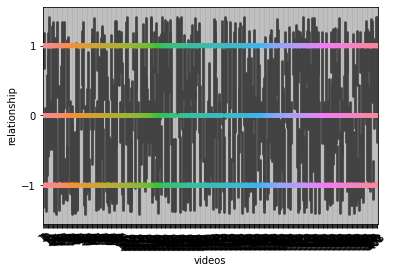

In [ ]:
## Boxplots
new = data.replace({"relationship": {'friendly':1, 'neutral': 0, 'adversarial': -1}})
display(new)

fig, ax = plt.subplots()
sns.set_theme()
sns.set(rc={'figure.figsize':(100,10)})
sns.set(font_scale=2)

# draw pointplot
'''
sns.boxplot(x = "videos", y = "relationship", data = new, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, boxprops=dict(alpha=.3))
sns.stripplot(x = "videos", y = "relationship", data = new)
'''

#sns.lineplot(x='videos', y='relationship', data=new, marker='o', linestyle='', err_style='bars', ci = "sd")
sns.barplot(x='videos', y='relationship', data=new, alpha=0.3, ci="sd")
sns.swarmplot(x = "videos", y = "relationship", data = new)

ax.set_xticklabels([str(i) for i in range(1,404)], rotation=45)
# show the plot
ax.xaxis.grid(True)
plt.show()

,relationship
videos,
D081820_133633,13
D081820_165452,14
D081920_015612,11
D081920_035959,11
D081920_080232,10
...,...
D121320_071459,13
D121320_134054,11
D121420_001402,11


,relationship
videos,
D081820_133633,"(0.6923076923076923, 0.7216024245882199, 0.0)"
D081820_165452,"(-1.0, 0.0, 0.0)"
D081920_015612,"(-0.9090909090909091, 0.28747978728803447, 0.0)"
D081920_035959,"(-0.36363636363636365, 0.8813963377120598, 0.0)"
D081920_080232,"(1.0, 0.0, 0.0)"
...,...
D121320_071459,"(0.6153846153846154, 0.48650425541051995, 0.0)"
D121320_134054,"(0.9090909090909091, 0.28747978728803447, 0.0)"
D121420_001402,"(0.8181818181818182, 0.385694607919935, 0.0)"


[]

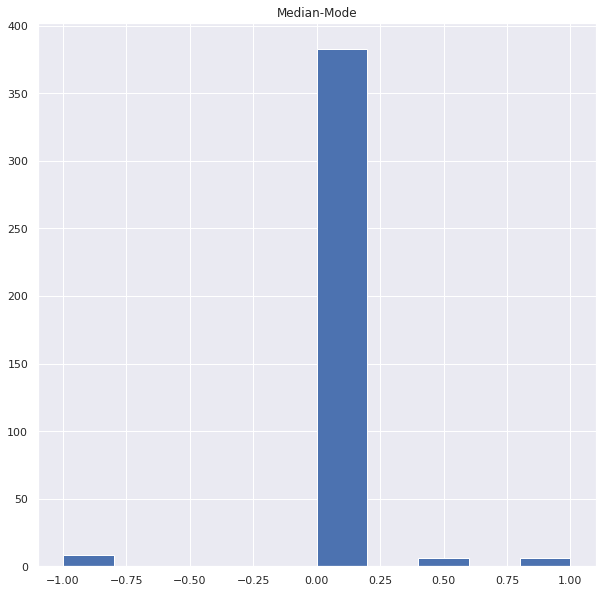

In [ ]:
import scipy

## Lineplot
def get_dist_stats(g):
  mapping = {'friendly':1, 'neutral': 0, 'adversarial': -1}
  ratings = [mapping[x] for x in g]
  stats = (np.mean(ratings), np.std(ratings), np.median(ratings) - scipy.stats.mode(ratings)[0][0]) #median-mode
  #stats = (np.mean(ratings), np.std(ratings), np.median(ratings) - np.mean(ratings)) #median-mean
  #stats = (np.mean(ratings), np.std(ratings), np.mean(ratings) - scipy.stats.mode(ratings)[0][0]) #median-mode
  return stats

display(HR)

HR_stats = data.groupby(by='videos').agg(lambda x: get_dist_stats(list(x)))
HR_stats.index = HR_stats.index.str[:14]
display(HR_stats)

means = [x[0] for x in HR_stats['relationship']]
stds = [x[1] for x in HR_stats['relationship']]
stats_df = {"videos":HR_stats.index, "means":means,"std":stds}

'''
fig, ax = plt.subplots()
sns.set_theme()
sns.set(rc={'figure.figsize':(100,10)})
sns.set(font_scale=2)

# draw pointplot
#sns.lineplot(x = "videos", y = "means", data = stats_df, linestyle='')
sns.lineplot(x='videos', y='relationship', data=new, marker='o', linestyle='', err_style='bars', ci = "sd")

ax.set_xticklabels([str(i) for i in range(1,404)], rotation=45)
# show the plot
ax.xaxis.grid(True)
plt.show()
'''
sns.set(rc={'figure.figsize':(10,10)})
stat_difference = [x[2] for x in HR_stats['relationship']]
plt.hist(stat_difference)
plt.title('Median-Mode')
plt.plot()

In [ ]:
print("Total data files: ", n_subjects)
print("No. of (complete) Human Responses: ", len(human_responses))
print("No. of subjects to be rejected due to example video ratings: ", no_subjects_to_reject_exampleVideoBased)
print()
print("No. of ratings per video (distribution): ", Counter(HR.relationship))

Total data files:  330
No. of (complete) Human Responses:  298
No. of subjects to be rejected due to example video ratings:  57

No. of ratings per video (distribution):  Counter({11: 160, 13: 120, 14: 40, 10: 40, 15: 20, 12: 20, 241: 3})


## **Ground Truth v/s Human Ratings (our)**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd gdrive/My\ Drive/Help-Hinder_GNN_Project

/content/gdrive/My Drive/Help-Hinder_GNN_Project


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import os
import pickle

Train Set

In [ ]:
path = './PHASE/train'
n_videos = len(os.listdir(path))

with open('./Human_Experiment_Files/human_rating_labels', 'rb') as file:
    human_ratings_labels_dict = pickle.load(file)

GT = []
HR = []
for root, dirs, files, in os.walk(path):
  for file in files:
    if file.endswith(".pik"):
      open_f = open(path + '/' + file, 'rb')
      open_f_data = pickle.load(open_f)
      v = {}
      v['name'] = file[:-3] + 'mp4'
      GT.append(open_f_data['modes'][0][0])
      HR.append(human_ratings_labels_dict[v['name']]['relationship'])

print("GT", Counter(GT))
print("HR", Counter(HR))
print("\n HR v/s GT")
print(confusion_matrix(HR,GT))

print("\n GT v/s HR")
print(confusion_matrix(GT, HR))

GT Counter({'neutral': 234, 'friendly': 108, 'adversarial': 58})
HR Counter({'friendly': 161, 'adversarial': 154, 'neutral': 85})

 HR v/s GT
[[ 50   3 101]
 [  4  95  62]
 [  4  10  71]]

 GT v/s HR
[[ 50   4   4]
 [  3  95  10]
 [101  62  71]]


Run PHASE human ratings code section before next block

In [ ]:
path = './PHASE/test'
n_videos = len(os.listdir(path))

with open('./Human_Experiment_Files/human_rating_labels_test', 'rb') as file:
    human_ratings_labels_dict = pickle.load(file)

GT = []
HR = []
HR_PHASE = []
mapping = {'Friendly':'friendly', "Neutral":'neutral', 'Adversarial':'adversarial'}
for root, dirs, files, in os.walk(path):
  for file in files:
    if file.endswith(".pik"):
      open_f = open(path + '/' + file, 'rb')
      open_f_data = pickle.load(open_f)
      v = {}
      v['name'] = file[:-3] + 'mp4'
      GT.append(open_f_data['modes'][0][0])
      HR.append(human_ratings_labels_dict[v['name']]['relationship'])
      
      ind = file.find('G')
      f_name = file[:15]+ file[ind-1:ind+35]
      HR_PHASE.append(mapping[HR_PHASE_dict[f_name]['relationship']])

print("GT", Counter(GT))
print("HR", Counter(HR))
print("HR_PHASE", Counter(HR_PHASE))
print("\n HR v/s GT")
print(confusion_matrix(HR,GT))

print("\n GT v/s HR")
print(confusion_matrix(GT, HR))

print("\n HR v/s HR_PHASE")
print(confusion_matrix(HR, HR_PHASE))

print("\n GT v/s HR_PHASE")
print(confusion_matrix(GT, HR_PHASE))

GT Counter({'neutral': 62, 'friendly': 21, 'adversarial': 17})
HR Counter({'friendly': 37, 'adversarial': 36, 'neutral': 27})
HR_PHASE Counter({'friendly': 38, 'adversarial': 37, 'neutral': 25})

 HR v/s GT
[[17  0 19]
 [ 0 19 18]
 [ 0  2 25]]

 GT v/s HR
[[17  0  0]
 [ 0 19  2]
 [19 18 25]]

 HR v/s HR_PHASE
[[35  0  1]
 [ 1 36  0]
 [ 1  2 24]]

 GT v/s HR_PHASE
[[17  0  0]
 [ 0 21  0]
 [20 17 25]]
